4.24 修改意见

再拓展一下，把全部2天的数据都算了
测试5的点位有没有找出来？
我猜大部分时间花在了IO上面。你看看能不能再这之前把要计算的通道选好，内存读到数据后做计算，计算1个通道的psd跟100个通道应该差不太多，这样吧，把每20个通道算一个结果，我们把这条路上的信号水平都算出来
不要直接画图。我们需要中间过程的结果来做更深入的分析，把中间结果保存好


9649
482
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.333

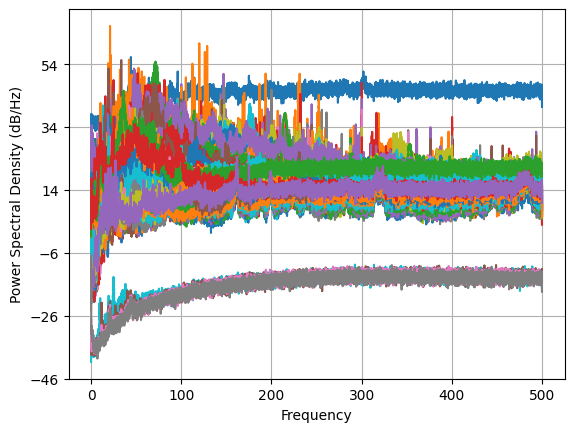

In [1]:
# last modified 2024/4/24 
# %matplotlib ipympl
%matplotlib inline
import h5py 
import glob
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from DasTools import DasPrep as dp
import os
import datetime
import matplotlib
import logging
import csv
import time
def concat(flist , start = 0 , span = 20 ):
    datalist = []
    for fname in flist[ start : start + span ]:
        data = dp.read_das(fname)[::10]
        datalist.append(data)

    data = np.concatenate(datalist, axis = 1)
    utc_datetime = datetime.datetime.strptime(flist[start][-22 : -7],'%Y%m%d_%H%M%S') + datetime.timedelta(hours=+8)
    utc_day = utc_datetime.strftime("%m-%d %H:%M")
    return data , utc_datetime, utc_day 


def psd(h5file , startn,endn):
    with h5py.File(h5file, 'a') as f:
    # 创建一个dataset
        span_each_pic = 20 #12h -> 50min
        concat_time = 0
        ch_list = [10*i for i in range(148)]
        for n in range(startn, endn):
            data , utc_datetime, utc_day = concat(flist , start= span_each_pic * n ,span= span_each_pic)
            nfft = 30000
            fs = 1000
            start = time.time()
            for i in range(148):
                ch = ch_list[i]
                if not f.__contains__(str(ch_list[i])):   #判断这个组存不存在
                    g = f.create_group(str(ch_list[i]))
                else:
                    g = f[str(ch_list[i])]
                # g =  f.create_group(str(ch_list[i]))  
                [Pxx1,f1] = plt.psd(data[i],                   # 随机信号
                                NFFT=nfft,               # 每个窗的长度
                                Fs=fs,                   # 采样频率   
                                detrend='mean',          # 去掉均值
                                window=np.hanning(nfft), # 加汉尼窗
                                noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
                                sides='onesided')        # 求单边谱
                plt.close
                g.create_dataset(str(utc_day),  data=Pxx1)
            concat_time +=  time.time() -start
            print(n , "拼接运行时间:%.2f min %d s"%( int(concat_time / 60) , concat_time%60) , datetime.datetime.now() , utc_day, "check in ")
        f.close()

flist = glob.glob('../../czyc/test3/*357.h5')
flist.sort()
print(len(flist))

path = '../output/DAS/'
if not os.path.exists(path):
    os.makedirs(path)

print(int(len(flist)/20))

# h5fname = '../output/DAS/psd_4_25_1.hdf5'
# psd(h5fname , 0 , 72 ) #31m39s / 14min 18s --->6h
# h5fname = '../output/DAS/psd_4_25_2.hdf5'
# psd(h5fname , 136 , 144 ) #31m39s / 14min 18s --->



In [27]:
h5fname = '../output/DAS/psd_4_25_3_.hdf5'
psd(h5fname , 144 , 216 ) #27m35s / 11min 33s --->

144 拼接运行时间:0.00 min 12 s 2024-04-25 23:05:08.787340 01-04 10:05 check in 
145 拼接运行时间:0.00 min 23 s 2024-04-25 23:05:33.208286 01-04 10:10 check in 
146 拼接运行时间:0.00 min 34 s 2024-04-25 23:05:59.544217 01-04 10:15 check in 
147 拼接运行时间:0.00 min 46 s 2024-04-25 23:06:26.755086 01-04 10:20 check in 
148 拼接运行时间:0.00 min 59 s 2024-04-25 23:06:53.472053 01-04 10:25 check in 
149 拼接运行时间:1.00 min 12 s 2024-04-25 23:07:17.973400 01-04 10:30 check in 
150 拼接运行时间:1.00 min 24 s 2024-04-25 23:07:43.978098 01-04 10:35 check in 
151 拼接运行时间:1.00 min 37 s 2024-04-25 23:08:10.437806 01-04 10:40 check in 
152 拼接运行时间:1.00 min 51 s 2024-04-25 23:08:42.475919 01-04 10:45 check in 


KeyboardInterrupt: 

In [ ]:
h5fname = '../output/DAS/psd_4_25_4_.hdf5'
psd(h5fname , 216 , 288 ) #31m39s / 14min 18s --->

288 拼接运行时间:0.00 min 12 s 2024-04-25 16:16:22.264642 01-04 22:05 check in 
289 拼接运行时间:0.00 min 26 s 2024-04-25 16:16:49.211607 01-04 22:10 check in 
290 拼接运行时间:0.00 min 37 s 2024-04-25 16:17:14.316806 01-04 22:15 check in 
291 拼接运行时间:0.00 min 48 s 2024-04-25 16:17:40.641183 01-04 22:20 check in 
292 拼接运行时间:0.00 min 58 s 2024-04-25 16:18:06.154627 01-04 22:25 check in 
293 拼接运行时间:1.00 min 10 s 2024-04-25 16:18:30.773653 01-04 22:30 check in 
294 拼接运行时间:1.00 min 20 s 2024-04-25 16:18:54.529817 01-04 22:35 check in 
295 拼接运行时间:1.00 min 32 s 2024-04-25 16:19:18.644134 01-04 22:40 check in 
296 拼接运行时间:1.00 min 43 s 2024-04-25 16:19:44.622889 01-04 22:45 check in 
297 拼接运行时间:1.00 min 54 s 2024-04-25 16:20:10.240798 01-04 22:50 check in 
298 拼接运行时间:2.00 min 5 s 2024-04-25 16:20:37.113208 01-04 22:55 check in 
299 拼接运行时间:2.00 min 17 s 2024-04-25 16:21:04.012106 01-04 23:00 check in 
300 拼接运行时间:2.00 min 28 s 2024-04-25 16:21:28.423887 01-04 23:05 check in 
301 拼接运行时间:2.00 min 40 s 2024-04-25 16:

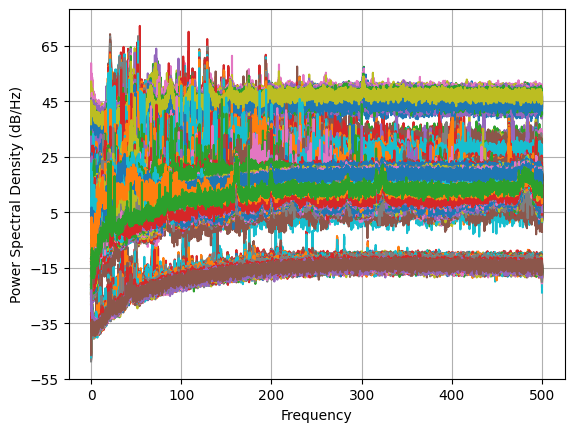

In [ ]:
# h5fname = '../output/DAS/psd_4_25_5.hdf5'
# psd(h5fname , 288 , 360 ) #36m57s / 13min 20s --->

In [ ]:
# h5fname = '../output/DAS/psd_4_25_6.hdf5'
# psd(h5fname , 360 , 432 ) #34m29s / 13min 54s --->

[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 4.99933333e+02
 4.99966667e+02 5.00000000e+02]
[0.00000000e+00 3.33333333e-02

KeyboardInterrupt: 

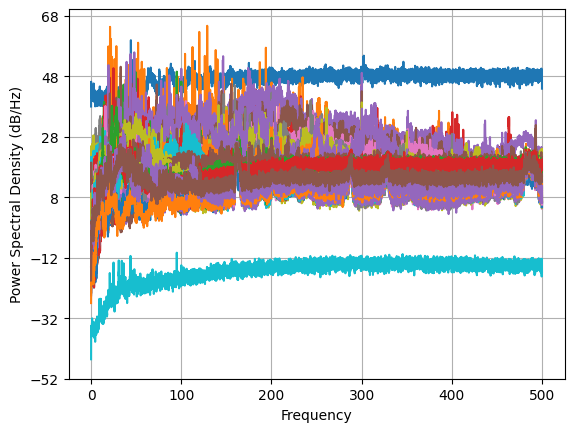

In [2]:
h5fname = '../output/DAS/psd_4_25_7.hdf5'
psd(h5fname , 432 , 433 ) #31m39s / 14min 18s --->

['03:22:05', '03:22:10', '03:22:15', '03:22:20', '03:22:25', '03:22:30', '03:22:35', '03:22:40', '03:22:45', '03:22:50', '03:22:55', '03:23:00', '03:23:05', '03:23:10', '03:23:15', '03:23:20', '03:23:25', '03:23:30', '03:23:35', '03:23:40', '03:23:45', '03:23:50', '03:23:55', '04:00:00', '04:00:05', '04:00:10', '04:00:15', '04:00:20', '04:00:25', '04:00:30', '04:00:35', '04:00:40', '04:00:45', '04:00:50', '04:00:55', '04:01:00', '04:01:05', '04:01:10', '04:01:15', '04:01:20', '04:01:25', '04:01:30', '04:01:35', '04:01:40', '04:01:45', '04:01:50', '04:01:55', '04:02:00', '04:02:05', '04:02:10', '04:02:15', '04:02:20', '04:02:25', '04:02:30', '04:02:35', '04:02:40', '04:02:45', '04:02:50', '04:02:55', '04:03:00', '04:03:05', '04:03:10', '04:03:15', '04:03:20', '04:03:25', '04:03:30', '04:03:35', '04:03:40', '04:03:45', '04:03:50', '04:03:55', '04:04:00']
read 1
['04 04:05', '04 04:10', '04 04:15', '04 04:20', '04 04:25', '04 04:30', '04 04:35', '04 04:40', '04 04:45', '04 04:50', '04 04:

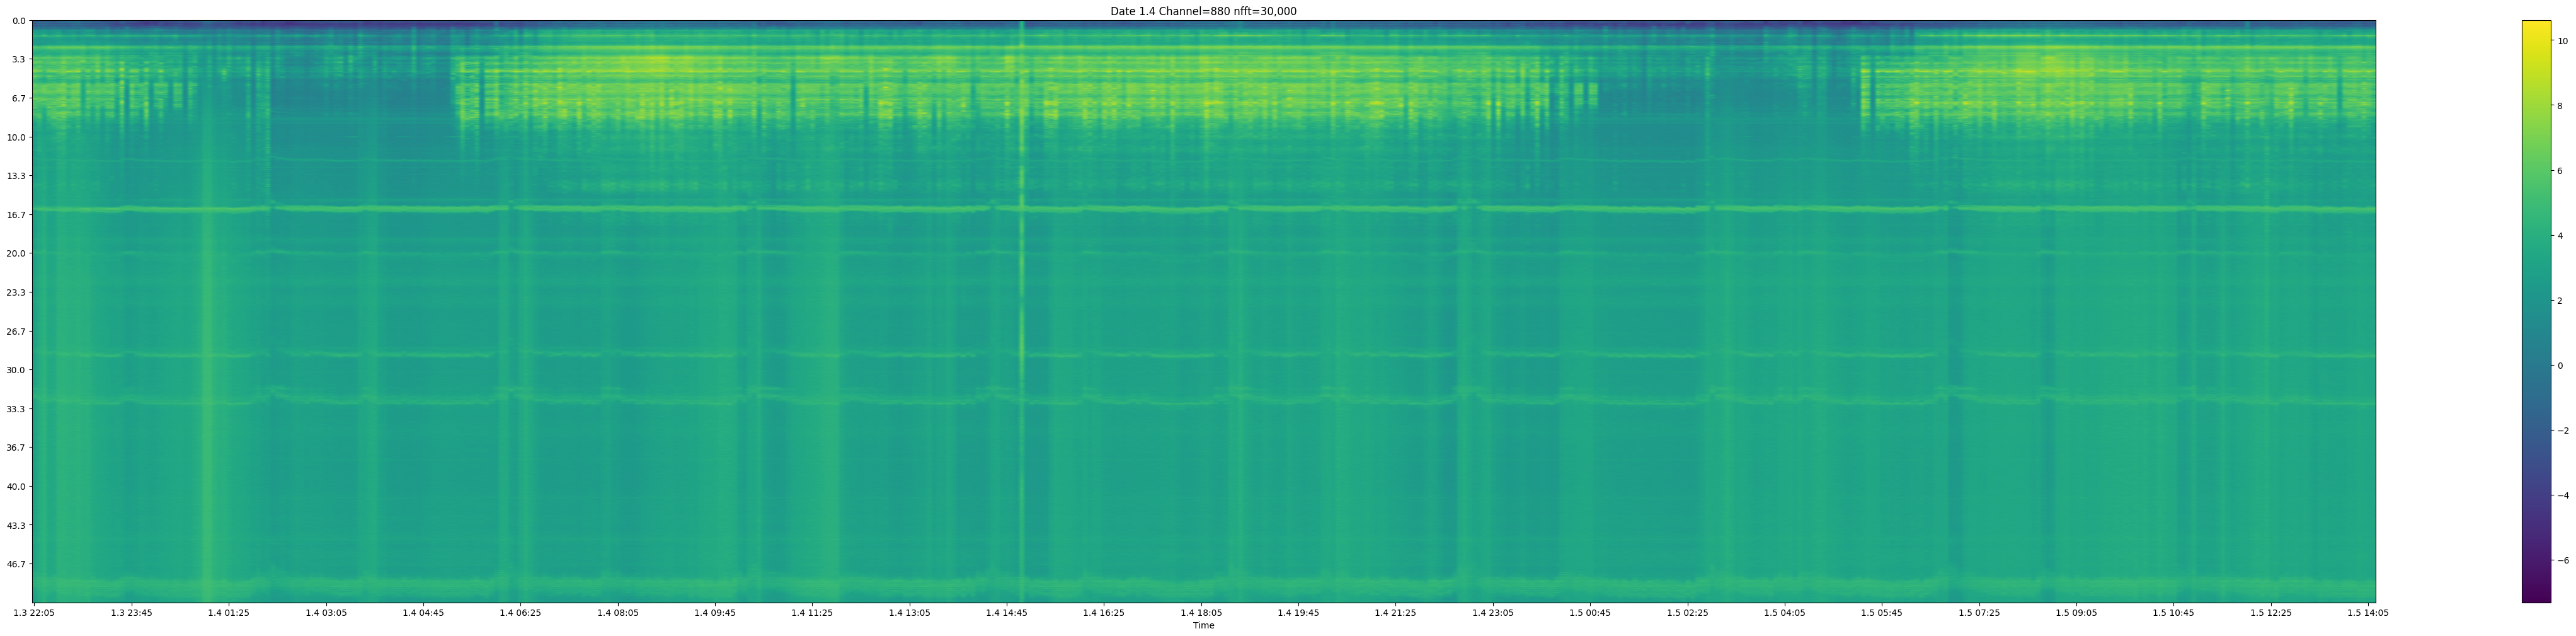

In [37]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
for ch in range(830,831):
    psd = []
    all_time = []
    for fi in range(1,8):
        with h5py.File('../output/DAS/psd_4_25_'+str(fi)+'.hdf5', 'r') as f:
            if len(f[str(ch)].keys()) == 1 :
                dset = f[str(ch)]['01']
            else:
                dset = f[str(ch)]
            time = [key for key in dset.keys()]
            print(time)
            # start = time.index('20:00:12')
            # time = time[start:]+time[:start]
            # print(time)

            psd.append(  [dset[key][:] for key in time])
            all_time.append(time[:])
            f.close()
            print("read",fi)
    
    print(len(psd))
    print(len(all_time))
    psd = np.concatenate(psd)
    time = np.concatenate(all_time)
    print(psd.shape)
    print(len(time))
    psd = np.log(psd)
    plt.figure(figsize=(60,12))
    # plt.imshow(psd.T, aspect='auto', cmap='viridis',vmin=-15, vmax=15)
    plt.imshow(psd.T, aspect='auto', cmap='viridis')

    xstick = range(0, len(time) , 20)
    ystick = [1000*i for i in range(15)]
    # print(f['frequency'].shape)

    plt.xticks(xstick , ["1."+time[i][-7]+" "+time[i][-5:]  for i in xstick],rotation = 0)
    # plt.xticks(xstick , [time[i][:2]+" "+time[i][3:]  for i in xstick],rotation = 0)

    plt.yticks(ystick , ['%.1f'% (i/300.)  for i in ystick])
    # plt.yscale('log')
    # plt.ylabel("log(Frequency)")
    plt.xlabel("Time")
    plt.title("Date 1.4 Channel="+str(ch)+" nfft=30,000")

    plt.colorbar()
